<a href="https://colab.research.google.com/github/NYahirGranadosVargas/Proyectos-/blob/main/Yahir_Granados_Vargas_Proyecto_M7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#Para la Gráfica
import matplotlib.pyplot as plt
#Para la nube de palabras
from wordcloud import WordCloud
from nltk import FreqDist
#Para la vectorización
from sklearn.feature_extraction.text import CountVectorizer
#Para el entrenamiento 1
from sklearn.linear_model import LogisticRegression
#Para la matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Ucamp/Your Career Aspirations of GenZ.csv')

In [ ]:
df.sample()

,Your Current Country.,Your Current Zip Code / Pin Code,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,Would you work for a company whose mission is not clearly defined and publicly posted.,How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,Which of the below careers looks close to your Aspirational job ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
43,India,826004,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Learning by obser...","Design and Creative strategy in any company, T...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team"


In [ ]:
df["Your Current Country."].value_counts()

India                       231
Germany                       2
United Arab Emirates          1
United States of America      1
Name: Your Current Country., dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   Your Current Country.                                                                                                     235 non-null    object
 1   Your Current Zip Code / Pin Code                                                                                          235 non-null    int64 
 2   Your Gender                                                                                                               235 non-null    object
 3   Which of the below factors influence the most about your career aspirations ?                                             235 non-null    ob

# Para este caso me enfoque en preguntas mas especificas, con el fin de saber que ambiente de trabajo es de su elección.

---



Aquí empezamos con la limpíeza de los datos

In [ ]:
#eliminamos las columnas que no son de tanta importancia para el modelo
df = df.drop(columns=['How likely would you work for a company whose mission is misaligned with their public actions or even their product ?','Which type of learning environment that you are most likely to work in ?',
                      'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.',
                      'Which of the below factors influence the most about your career aspirations ?','How likely is that you will work for one employer for 3 years or more ?',
                      'Your Current Country.','Your Current Zip Code / Pin Code','What type of Manager would you work without looking into your watch ?',
                      'Which of the below Employers would you work with.','How likely would you work for a company whose mission is not bringing social impact ?',
                      'Would you work for a company whose mission is not clearly defined and publicly posted.','Which of the following setup you would like to work ?'], axis=1)

In [ ]:
df.head()

,Your Gender,What is the most preferred working environment for you.,Which of the below careers looks close to your Aspirational job ?
0,Male,Fully Remote with No option to visit offices,"Business Operations in any organization, Build..."
1,Male,Fully Remote with Options to travel as and whe...,"Business Operations in any organization, Build..."
2,Female,Hybrid Working Environment with less than 15 d...,Manage and drive End-to-End Projects or Produc...
3,Male,Hybrid Working Environment with less than 15 d...,"Business Operations in any organization, Manag..."
4,Female,Fully Remote with Options to travel as and whe...,Teaching in any of the institutes/online or Of...


In [ ]:
df.dtypes

Your Gender                                                          object
What is the most preferred working environment for you.              object
Which of the below careers looks close to your Aspirational job ?    object
dtype: object

In [ ]:
completitud = pd.DataFrame(df.isnull().sum())
completitud

,0
Your Gender,0
What is the most preferred working environment for you.,0
Which of the below careers looks close to your Aspirational job ?,0


In [ ]:
df.isnull().sum()

Your Gender                                                          0
What is the most preferred working environment for you.              0
Which of the below careers looks close to your Aspirational job ?    0
dtype: int64

In [ ]:
print(completitud.index)

Index(['Your Gender',
       'What is the most preferred working environment for you.',
       'Which of the below careers looks close to your Aspirational job ?'],
      dtype='object')


In [ ]:
# Generamos las nuevas columnas con dummies
dummies = pd.get_dummies(df['Your Gender'])

In [ ]:
dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
230,0,1
231,0,1
232,1,0
233,0,1


In [ ]:
# Agregamos al dataset de los dummies
new_df = pd.concat([df,dummies],axis='columns')
print(type(new_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
new_df.columns

Index(['Your Gender',
       'What is the most preferred working environment for you.',
       'Which of the below careers looks close to your Aspirational job ?',
       'Female', 'Male'],
      dtype='object')

In [ ]:
#Asi queda nuestro nuevo data set
new_df.sample(5)

,Your Gender,What is the most preferred working environment for you.,Which of the below careers looks close to your Aspirational job ?,Female,Male
200,Male,Hybrid Working Environment with less than 3 da...,"Business Operations in any organization, Build...",0,1
41,Male,Fully Remote with No option to visit offices,"Design and Creative strategy in any company, M...",0,1
12,Male,Hybrid Working Environment with less than 15 d...,"Design and Creative strategy in any company, T...",0,1
149,Female,Fully Remote with Options to travel as and whe...,Teaching in any of the institutes/online or Of...,1,0
49,Female,Hybrid Working Environment with less than 10 d...,Manage and drive End-to-End Projects or Produc...,1,0


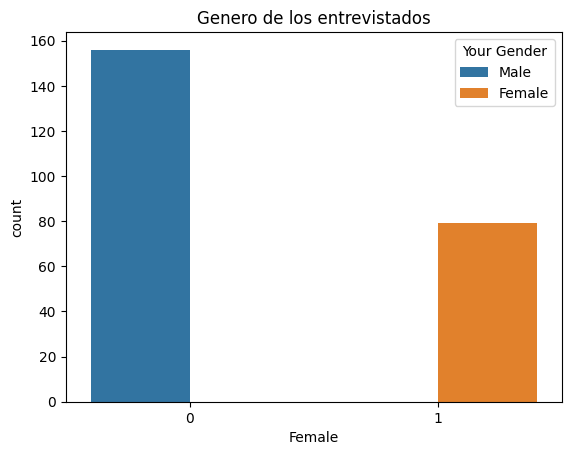

In [ ]:
#Hacemos el histograma del genero
sns.countplot(x=new_df["Female"],hue=new_df["Your Gender"])
plt.title("Genero de los entrevistados")
plt.show()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('', '', text)
    text = re.sub("\W"," ",text)
    #Remove urls
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    #Remove numbers
    text = re.sub('\w*\d\w*', '', text)
    #Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    return text

In [ ]:
new_df.head()

,Your Gender,What is the most preferred working environment for you.,Which of the below careers looks close to your Aspirational job ?,Female,Male
0,Male,Fully Remote with No option to visit offices,"Business Operations in any organization, Build...",0,1
1,Male,Fully Remote with Options to travel as and whe...,"Business Operations in any organization, Build...",0,1
2,Female,Hybrid Working Environment with less than 15 d...,Manage and drive End-to-End Projects or Produc...,1,0
3,Male,Hybrid Working Environment with less than 15 d...,"Business Operations in any organization, Manag...",0,1
4,Female,Fully Remote with Options to travel as and whe...,Teaching in any of the institutes/online or Of...,1,0


In [ ]:
#Amplicamos la funcion para dejar los registros sin caracteres no deseados
new_df['What is the most preferred working environment for you.'] = new_df['What is the most preferred working environment for you.'].apply(clean_text)
new_df['Which of the below careers looks close to your Aspirational job ?'] = new_df['Which of the below careers looks close to your Aspirational job ?'].apply(clean_text)

In [ ]:
new_df.head()

,Your Gender,What is the most preferred working environment for you.,Which of the below careers looks close to your Aspirational job ?,Female,Male
0,Male,fully remote with no option to visit offices,business operations in any organization build...,0,1
1,Male,fully remote with options to travel as and whe...,business operations in any organization build...,0,1
2,Female,hybrid working environment with less than day...,manage and drive end to end projects or produc...,1,0
3,Male,hybrid working environment with less than day...,business operations in any organization manag...,0,1
4,Female,fully remote with options to travel as and whe...,teaching in any of the institutes online or of...,1,0


In [ ]:
#label_encoder_reviews = LabelEncoder()

In [ ]:
'''#Prueba
for col in new_df.columns:
    col_type = new_df[col].dtype

    if col_type == 'object':
        values = new_df[col].values
        labels = label_encoder_reviews.fit_transform(values)
        mapping = dict(enumerate(label_encoder_reviews.classes_))
        #print(values, "\n", labels, "\n", label_encoder.classes_, "\n", mapping, "\n\n")
        new_df[col] = label_encoder_reviews.transform(values)
        print(f"Mapping for {col}: {mapping}")'''

'#Prueba\nfor col in new_df.columns:\n    col_type = new_df[col].dtype\n\n    if col_type == \'object\':\n        values = new_df[col].values\n        labels = label_encoder_reviews.fit_transform(values)\n        mapping = dict(enumerate(label_encoder_reviews.classes_))\n        #print(values, "\n", labels, "\n", label_encoder.classes_, "\n", mapping, "\n\n")\n        new_df[col] = label_encoder_reviews.transform(values)\n        print(f"Mapping for {col}: {mapping}")'

In [ ]:
new_df.sample(5)

,Your Gender,What is the most preferred working environment for you.,Which of the below careers looks close to your Aspirational job ?,Female,Male
97,Male,every day office environment,look deeply into data and generate insights w...,0,1
93,Male,every day office environment,design and creative strategy in any company b...,0,1
90,Female,hybrid working environment with less than day...,manage and drive end to end projects or produc...,1,0
109,Male,hybrid working environment with less than day...,build and develop a team design and develop a...,0,1
119,Female,hybrid working environment with less than day...,design and creative strategy in any company l...,1,0


In [ ]:
new_df_2=new_df.rename(columns={'What is the most preferred working environment for you.':'Entorno_T',
                                   'Which of the below careers looks close to your Aspirational job ?':'Carrera'})

In [ ]:
new_df_2.head()

,Your Gender,Entorno_T,Carrera,Female,Male
0,Male,fully remote with no option to visit offices,business operations in any organization build...,0,1
1,Male,fully remote with options to travel as and whe...,business operations in any organization build...,0,1
2,Female,hybrid working environment with less than day...,manage and drive end to end projects or produc...,1,0
3,Male,hybrid working environment with less than day...,business operations in any organization manag...,0,1
4,Female,fully remote with options to travel as and whe...,teaching in any of the institutes online or of...,1,0


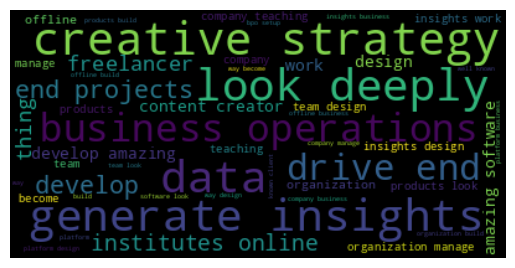

In [ ]:
#Se crea una lista de palabras de parada
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
#Se une el texto de todas las críticas en una cadena y se crea una nube de palabras usando esta cadena.
textt = " ".join(review for review in new_df_2.Carrera)
#Se establecen algunas palabras de parada adicionales para eliminarlas de la nube de palabras.
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
new_df_2['Female'].astype(int)

Series([], Name: Female, dtype: int64)

In [ ]:
new_df_2['Female'].info()

<class 'pandas.core.series.Series'>
Int64Index: 0 entries
Series name: Female
Non-Null Count  Dtype
--------------  -----
0 non-null      uint8
dtypes: uint8(1)
memory usage: 0.0 bytes


In [ ]:
# Generar una gráfica con tuits Positivos
df_positive = new_df_2[new_df_2['Female'] == 5]
df_positive['Entorno_T'].str.split().apply(FreqDist).sum().plot(10, cumulative=False)
plt.title('Gráfica de palabras más frecuentes en tuits positivos')
plt.ylabel('Frecuencia')
plt.xlabel('Palabras')
plt.show()

AttributeError: ignored

In [ ]:
#Se genera una nube de palabras para los tuits positivos
text_positive = df_positive['Entorno_T'].str.cat(sep=' ')
wordcloud_positive = WordCloud(width=800, height=500, max_font_size=100).generate(text_positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras para los tuits positivos')
plt.show()

ValueError: ignored

In [ ]:
X= new_df['What is the most preferred working environment for you.']
y = new_df['Female']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=18)

In [ ]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

In [ ]:
#Convertimos a numeros Tokenizando
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [ ]:
type(X_train)

list

In [ ]:
len(X_train)

188

In [ ]:
len(X_train[15])

4

Es necesario ajustar los tamaños de los datos para que no se genere el conflicto

In [ ]:
#Igualar los tamaños
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', truncating='post', maxlen=50)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', truncating='post', maxlen=50)

In [ ]:
X_train.shape, X_test.shape # Tienen la misma cantidad e columnas

((188, 50), (47, 50))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=50, input_length=50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenamos el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [ ]:
# Evaluamos el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Presición Test: %.3f' % acc)

Presición Test: 0.745


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=1000,
    shuffle=True,
    callbacks=[early_stop]
)

Epoch 1/10
1/1 [==============================] - 0s 132ms/step - loss: 0.6500 - accuracy: 0.6450 - val_loss: 0.6593 - val_accuracy: 0.6316
Epoch 2/10
1/1 [==============================] - 0s 102ms/step - loss: 0.6498 - accuracy: 0.6450 - val_loss: 0.6594 - val_accuracy: 0.6316
Epoch 3/10
1/1 [==============================] - 0s 107ms/step - loss: 0.6499 - accuracy: 0.6450 - val_loss: 0.6594 - val_accuracy: 0.6316


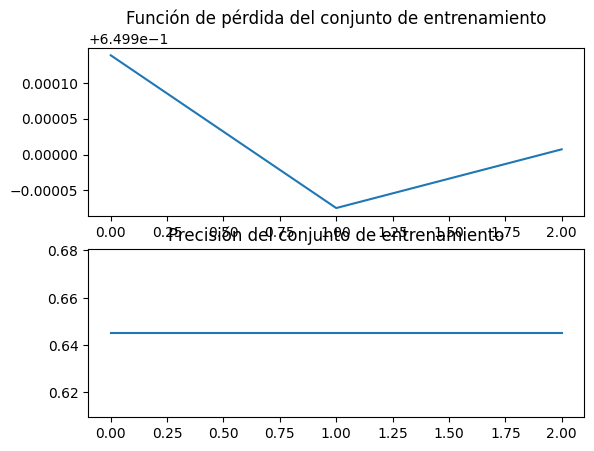

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['loss'])
ax1.set_title('Función de pérdida del conjunto de entrenamiento')

ax2 = fig.add_subplot(2,1,2, sharex= ax1)
ax2.plot(history.history['accuracy'])
ax2.set_title('Precisión del conjunto de entrenamiento')

plt.show()